# Harring project 

#### Instalowanie i ładowanie bibliotek

In [243]:
install.packages("gdata")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("gridExtra") 
install.packages("imputeTS")
install.packages("mice")
library(mice)
library(imputeTS)
library(dplyr)
library(ggplot2)
library(gridExtra)

Installing package into 'C:/Users/amiel/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'gdata' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\amiel\AppData\Local\Temp\RtmpwB3mGt\downloaded_packages


Installing package into 'C:/Users/amiel/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'dplyr' is in use and will not be installed"Installing package into 'C:/Users/amiel/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'ggplot2' is in use and will not be installed"Installing package into 'C:/Users/amiel/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'gridExtra' is in use and will not be installed"Installing package into 'C:/Users/amiel/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'imputeTS' is in use and will not be installed"Installing package into 'C:/Users/amiel/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'mice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\amiel\AppData\Local\Temp\RtmpwB3mGt\downloaded_packages


##### Atrybuty

1. length: długość złowionego śledzia [cm]
2. cfin1: dostępność planktonu [zagęszczenie Calanus finmarchicus gat. 1]
3. cfin2: dostępność planktonu [zagęszczenie Calanus finmarchicus gat. 2]
4. chel1: dostępność planktonu [zagęszczenie Calanus helgolandicus gat. 1]
5. chel2: dostępność planktonu [zagęszczenie Calanus helgolandicus gat. 2]
6. lcop1: dostępność planktonu [zagęszczenie Widłonogów gat. 1]
7. lcop2: dostępność planktonu [zagęszczenie Widłonogów gat. 2]
8. fbar: natężenie połowów w regionie [ułamek pozostawionego narybku]
9. recr: roczny narybek [liczba śledzi]
10. cumf: łączne roczne natężenie połowów w regionie [ułamek pozostawionego narybku]
11. totaln: łączna liczba ryb złowionych w ramach połowu [liczba śledzi]
12. sst: temperatura przy powierzchni wody [°C]
13. sal: poziom zasolenia wody [Knudsen ppt]
14. xmonth: miesiąc połowu [numer miesiąca]
15. nao: oscylacja północnoatlantycka [mb] 

#### Importowanie danych i podgląd

In [244]:
# przypisanie danych do zmiennej
fish_data <- read.csv(url("http://www.cs.put.poznan.pl/dbrzezinski/teaching/sphd/sledzie.csv"),
header = TRUE, sep = ",", na.strings = "?")
fish_data <- fish_data %>% rename(lp = X)

In [245]:
head(fish_data, nrow= 5)

lp,length,cfin1,cfin2,chel1,chel2,lcop1,lcop2,fbar,recr,cumf,totaln,sst,sal,xmonth,nao
0,23.0,0.02778,0.27785,2.46875,NA,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
1,22.5,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
2,25.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
3,25.5,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
4,24.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
5,22.0,0.02778,0.27785,2.46875,21.43548,2.54787,NA,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8


#### Podstawowe statystyki 

In [246]:
sprintf("Liczba wierszy razem z wartościami pustymi %d", nrow(fish_data))

[1] "Liczba wierszy razem z wartosciami pustymi 52582"

In [247]:
sprintf("Liczba wierszy bez pustych wierszy %d", nrow(na.omit(fish_data)))

[1] "Liczba wierszy bez pustych wierszy 42488"

In [248]:
sprintf("Liczba kolumn %d", ncol(fish_data))

[1] "Liczba kolumn 16"

In [249]:
summary(fish_data_clear)

       X             length         cfin1           cfin2      
 Min.   :    0   Min.   :19.0   0      :14287   0.70118: 4374  
 1st Qu.:13145   1st Qu.:24.0   0.02778: 2225   0      : 3806  
 Median :26291   Median :25.5   1.02508: 2067   0.296  : 3706  
 Mean   :26291   Mean   :25.3   1.21333: 1985   0.11736: 2106  
 3rd Qu.:39436   3rd Qu.:26.5   0.33333: 1914   4.55825: 2007  
 Max.   :52581   Max.   :32.5   0.11111: 1891   0.85684: 1665  
                                (Other):28213   (Other):34918  
      chel1            chel2            lcop1            lcop2      
 11.5    : 4787   5.67765 : 4365   23      : 4787   9.17171 : 4370  
 2.46875 : 2241   21.67333: 3710   2.54787 : 2215   24.85867: 3709  
 12.15192: 2109   39.56809: 2101   12.49588: 2105   41.65566: 2102  
 6.42127 : 2062   26.81218: 2002   10.92857: 2059   45.70773: 1998  
 19.15475: 2001   15.03   : 1941   21.23147: 1979   17.68   : 1959  
 9.66667 : 1926   9.43208 : 1661   27.33333: 1916   10.72889: 1676  
 (Oth

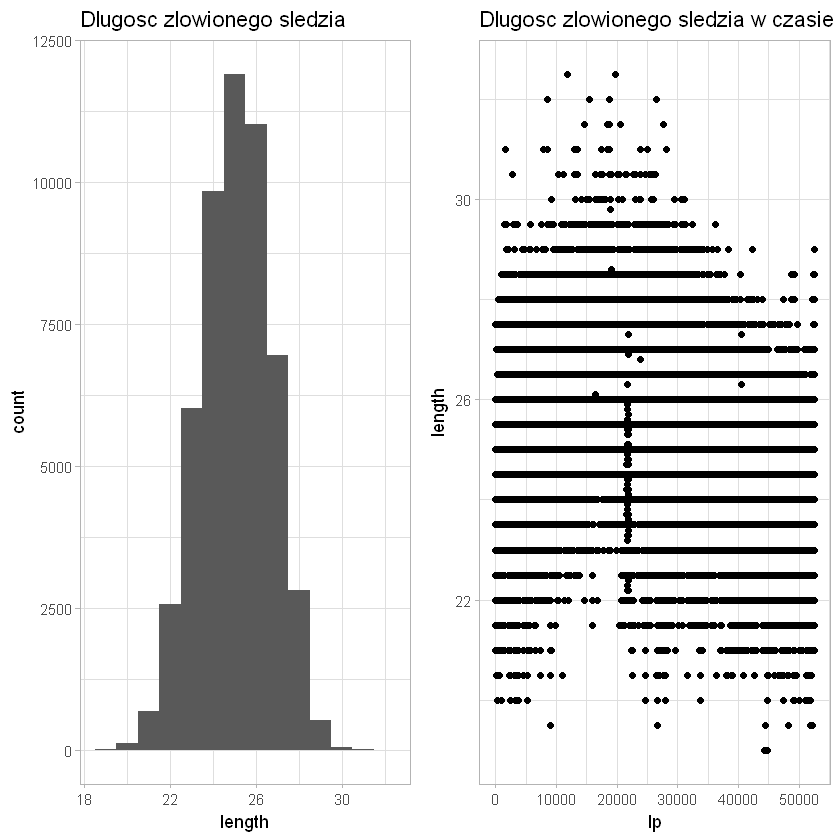

In [250]:
c_1 <- ggplot(fish_data, aes(length)) + geom_histogram(binwidth = 1) + 
  theme_light() + ggtitle('Długość złowionego śledzia')
c_2 <- ggplot(fish_data, aes(x=lp,y=length)) + geom_point() + theme_light() +
ggtitle('Długość złowionego śledzia w czasie')

grid.arrange(c_1,c_2, nrow=1)


Warning message:
"Removed 1581 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1536 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1555 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1556 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1653 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1591 rows containing non-finite values (stat_bin)."

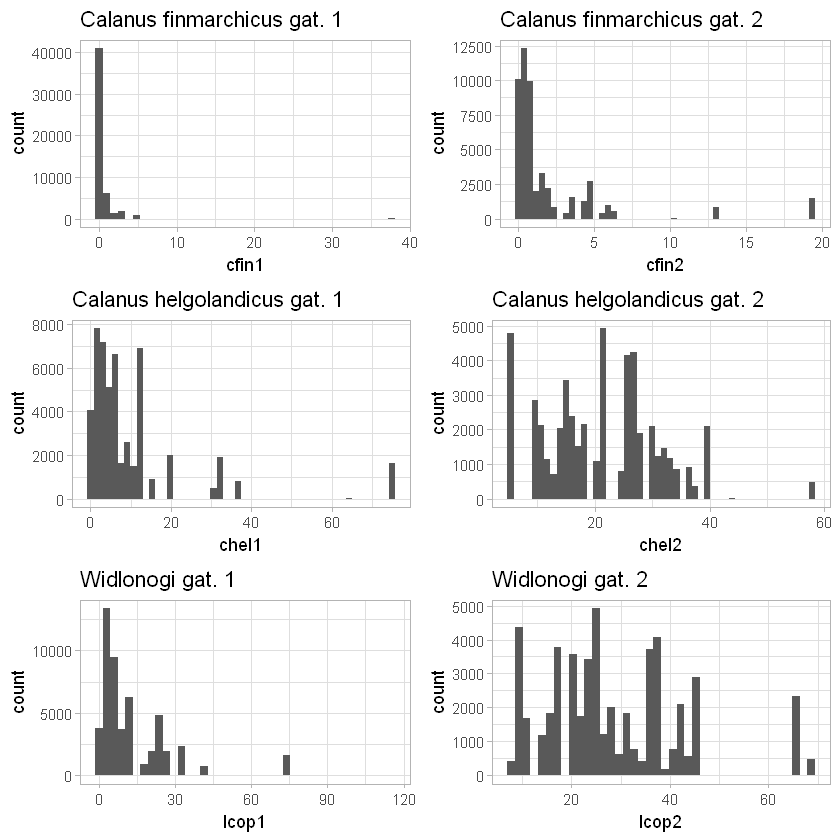

In [251]:
p_cfin1 <- ggplot(fish_data, aes(cfin1)) + geom_histogram(bins = 40) + 
  theme_light() + ggtitle('Calanus finmarchicus gat. 1')
p_cfin2 <- ggplot(fish_data, aes(cfin2)) + geom_histogram(bins = 50) + 
  theme_light() + ggtitle('Calanus finmarchicus gat. 2')
p_chel1 <- ggplot(fish_data, aes(chel1)) + geom_histogram(bins = 50) + 
  theme_light() + ggtitle('Calanus helgolandicus gat. 1')
p_chel2 <- ggplot(fish_data, aes(chel2)) + geom_histogram(bins = 50) + 
  theme_light() + ggtitle('Calanus helgolandicus gat. 2')
p_lcop1 <- ggplot(fish_data, aes(lcop1)) + geom_histogram(bins = 40) + 
  theme_light() + ggtitle('Widłonogi gat. 1')
p_lcop2 <- ggplot(fish_data, aes(lcop2)) + geom_histogram(bins = 40) + 
  theme_light()+ ggtitle('Widłonogi gat. 2')
grid.arrange(p_cfin1, p_cfin2,p_chel1,p_chel2,p_lcop1,p_lcop2, nrow=3)
#częstotliwość wystepowania zjawiska

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1584 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


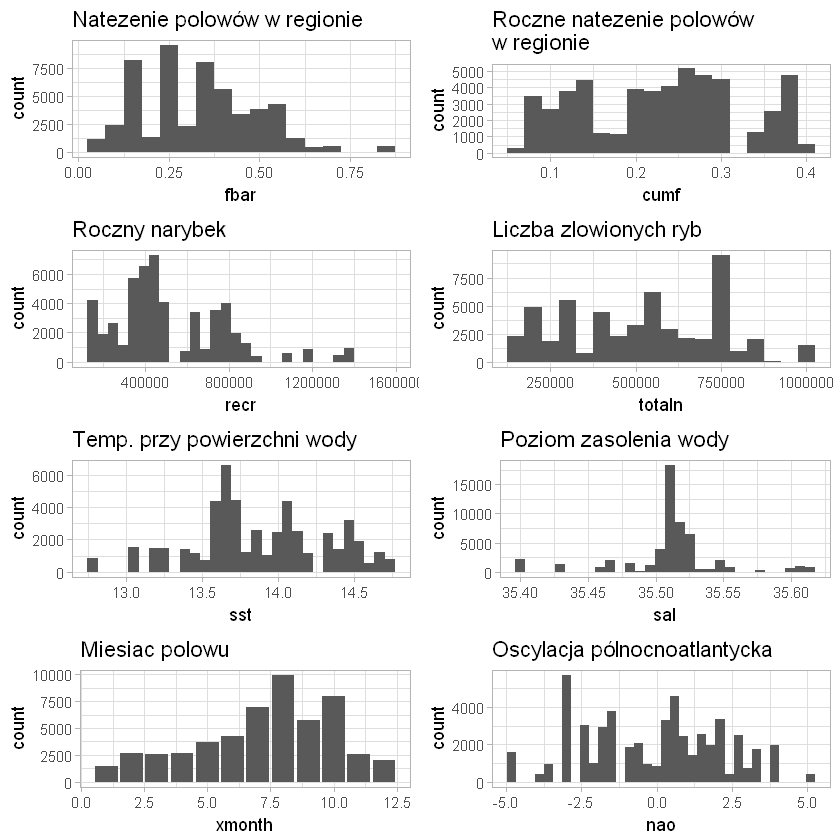

In [252]:
p_fbar <- ggplot(fish_data, aes(fbar)) + geom_histogram(binwidth = 0.05) + 
  theme_light() + ggtitle('Natężenie połowów w regionie')
p_cumf <- ggplot(fish_data, aes(cumf)) + geom_histogram(binwidth = 0.02) + 
  theme_light() + ggtitle('Roczne natężenie połowów\nw regionie')
p_recr <- ggplot(fish_data, aes(recr)) + geom_histogram() + 
  theme_light() + ggtitle('Roczny narybek')
p_totaln <- ggplot(fish_data, aes(totaln)) + geom_histogram(binwidth = 50000) + 
  theme_light() + ggtitle('Liczba złowionych ryb')
p_sst <- ggplot(fish_data, aes(sst)) + geom_histogram() + 
  theme_light() + ggtitle('Temp. przy powierzchni wody')
p_sal <- ggplot(fish_data, aes(sal)) + geom_histogram() + 
  theme_light() + ggtitle('Poziom zasolenia wody')
p_xmonth <- ggplot(fish_data, aes(xmonth)) + geom_bar(stat = 'count') + 
  theme_light() + ggtitle('Miesiąc połowu')
p_nao <- ggplot(fish_data, aes(nao)) + geom_histogram(binwidth = 0.3) + 
  theme_light() + ggtitle('Oscylacja północnoatlantycka')
grid.arrange(p_fbar, p_cumf, p_recr, p_totaln,p_sst,p_sal,p_xmonth,p_nao, nrow=4)


#### Zastępowanie wartości pustych

In [253]:
#kolumny zawierające wartości puste
colnames(fish_data)[apply(is.na(fish_data), 2, any)]


[1] "cfin1" "cfin2" "chel1" "chel2" "lcop1" "lcop2" "sst"

In [254]:
#cfin1
statsNA(fish_data$cfin1, bins = 5)

[1] "Length of time series:"
[1] 52582
[1] "-------------------------"
[1] "Number of Missing Values:"
[1] 1581
[1] "-------------------------"
[1] "Percentage of Missing Values:"
[1] "3.01%"
[1] "-------------------------"
[1] "Stats for Bins"
[1] "  Bin 1 (10517 values from 1 to 10517) :      303 NAs (2.88%)"
[1] "  Bin 2 (10517 values from 10518 to 21034) :      340 NAs (3.23%)"
[1] "  Bin 3 (10517 values from 21035 to 31551) :      294 NAs (2.8%)"
[1] "  Bin 4 (10517 values from 31552 to 42068) :      331 NAs (3.15%)"
[1] "  Bin 5 (10514 values from 42069 to 52582) :      313 NAs (2.98%)"
[1] "-------------------------"
[1] "Longest NA gap (series of consecutive NAs)"
[1] "3 in a row"
[1] "-------------------------"
[1] "Most frequent gap size (series of consecutive NA series)"
[1] "1 NA in a row (occuring 1480 times)"
[1] "-------------------------"
[1] "Gap size accounting for most NAs"
[1] "1 NA in a row (occuring 1480 times, making up for overall 1480 NAs)"
[1] "---------------

In [255]:
#cfin2
statsNA(fish_data$cfin2, bins = 5)

[1] "Length of time series:"
[1] 52582
[1] "-------------------------"
[1] "Number of Missing Values:"
[1] 1536
[1] "-------------------------"
[1] "Percentage of Missing Values:"
[1] "2.92%"
[1] "-------------------------"
[1] "Stats for Bins"
[1] "  Bin 1 (10517 values from 1 to 10517) :      312 NAs (2.97%)"
[1] "  Bin 2 (10517 values from 10518 to 21034) :      291 NAs (2.77%)"
[1] "  Bin 3 (10517 values from 21035 to 31551) :      302 NAs (2.87%)"
[1] "  Bin 4 (10517 values from 31552 to 42068) :      321 NAs (3.05%)"
[1] "  Bin 5 (10514 values from 42069 to 52582) :      310 NAs (2.95%)"
[1] "-------------------------"
[1] "Longest NA gap (series of consecutive NAs)"
[1] "3 in a row"
[1] "-------------------------"
[1] "Most frequent gap size (series of consecutive NA series)"
[1] "1 NA in a row (occuring 1461 times)"
[1] "-------------------------"
[1] "Gap size accounting for most NAs"
[1] "1 NA in a row (occuring 1461 times, making up for overall 1461 NAs)"
[1] "--------------

In [256]:
#chel1
statsNA(fish_data$chel1, bins = 5)

[1] "Length of time series:"
[1] 52582
[1] "-------------------------"
[1] "Number of Missing Values:"
[1] 1555
[1] "-------------------------"
[1] "Percentage of Missing Values:"
[1] "2.96%"
[1] "-------------------------"
[1] "Stats for Bins"
[1] "  Bin 1 (10517 values from 1 to 10517) :      296 NAs (2.81%)"
[1] "  Bin 2 (10517 values from 10518 to 21034) :      341 NAs (3.24%)"
[1] "  Bin 3 (10517 values from 21035 to 31551) :      293 NAs (2.79%)"
[1] "  Bin 4 (10517 values from 31552 to 42068) :      316 NAs (3%)"
[1] "  Bin 5 (10514 values from 42069 to 52582) :      309 NAs (2.94%)"
[1] "-------------------------"
[1] "Longest NA gap (series of consecutive NAs)"
[1] "3 in a row"
[1] "-------------------------"
[1] "Most frequent gap size (series of consecutive NA series)"
[1] "1 NA in a row (occuring 1471 times)"
[1] "-------------------------"
[1] "Gap size accounting for most NAs"
[1] "1 NA in a row (occuring 1471 times, making up for overall 1471 NAs)"
[1] "-----------------

In [257]:
#lcop1
statsNA(fish_data$lcop1, bins = 5)

[1] "Length of time series:"
[1] 52582
[1] "-------------------------"
[1] "Number of Missing Values:"
[1] 1653
[1] "-------------------------"
[1] "Percentage of Missing Values:"
[1] "3.14%"
[1] "-------------------------"
[1] "Stats for Bins"
[1] "  Bin 1 (10517 values from 1 to 10517) :      366 NAs (3.48%)"
[1] "  Bin 2 (10517 values from 10518 to 21034) :      292 NAs (2.78%)"
[1] "  Bin 3 (10517 values from 21035 to 31551) :      337 NAs (3.2%)"
[1] "  Bin 4 (10517 values from 31552 to 42068) :      312 NAs (2.97%)"
[1] "  Bin 5 (10514 values from 42069 to 52582) :      346 NAs (3.29%)"
[1] "-------------------------"
[1] "Longest NA gap (series of consecutive NAs)"
[1] "2 in a row"
[1] "-------------------------"
[1] "Most frequent gap size (series of consecutive NA series)"
[1] "1 NA in a row (occuring 1551 times)"
[1] "-------------------------"
[1] "Gap size accounting for most NAs"
[1] "1 NA in a row (occuring 1551 times, making up for overall 1551 NAs)"
[1] "---------------

In [258]:
#lcop2
statsNA(fish_data$lcop2, bins = 5)

[1] "Length of time series:"
[1] 52582
[1] "-------------------------"
[1] "Number of Missing Values:"
[1] 1591
[1] "-------------------------"
[1] "Percentage of Missing Values:"
[1] "3.03%"
[1] "-------------------------"
[1] "Stats for Bins"
[1] "  Bin 1 (10517 values from 1 to 10517) :      319 NAs (3.03%)"
[1] "  Bin 2 (10517 values from 10518 to 21034) :      343 NAs (3.26%)"
[1] "  Bin 3 (10517 values from 21035 to 31551) :      298 NAs (2.83%)"
[1] "  Bin 4 (10517 values from 31552 to 42068) :      302 NAs (2.87%)"
[1] "  Bin 5 (10514 values from 42069 to 52582) :      329 NAs (3.13%)"
[1] "-------------------------"
[1] "Longest NA gap (series of consecutive NAs)"
[1] "3 in a row"
[1] "-------------------------"
[1] "Most frequent gap size (series of consecutive NA series)"
[1] "1 NA in a row (occuring 1503 times)"
[1] "-------------------------"
[1] "Gap size accounting for most NAs"
[1] "1 NA in a row (occuring 1503 times, making up for overall 1503 NAs)"
[1] "--------------

In [259]:
#sst
statsNA(fish_data$sst, bins = 5)

[1] "Length of time series:"
[1] 52582
[1] "-------------------------"
[1] "Number of Missing Values:"
[1] 1584
[1] "-------------------------"
[1] "Percentage of Missing Values:"
[1] "3.01%"
[1] "-------------------------"
[1] "Stats for Bins"
[1] "  Bin 1 (10517 values from 1 to 10517) :      321 NAs (3.05%)"
[1] "  Bin 2 (10517 values from 10518 to 21034) :      313 NAs (2.98%)"
[1] "  Bin 3 (10517 values from 21035 to 31551) :      298 NAs (2.83%)"
[1] "  Bin 4 (10517 values from 31552 to 42068) :      310 NAs (2.95%)"
[1] "  Bin 5 (10514 values from 42069 to 52582) :      342 NAs (3.25%)"
[1] "-------------------------"
[1] "Longest NA gap (series of consecutive NAs)"
[1] "3 in a row"
[1] "-------------------------"
[1] "Most frequent gap size (series of consecutive NA series)"
[1] "1 NA in a row (occuring 1501 times)"
[1] "-------------------------"
[1] "Gap size accounting for most NAs"
[1] "1 NA in a row (occuring 1501 times, making up for overall 1501 NAs)"
[1] "--------------

Dla powyższych pozycji wartośći NA przyjmują maksymalnie 3.14%. Stosowne jest zastowanie podmienienie zmiennych za pomocą filtru Kalmana.

In [260]:
fish_data$cfin1 <- na.kalman(fish_data$cfin1)
fish_data$cfin2 <- na.kalman(fish_data$cfin2)
fish_data$chel1 <- na.kalman(fish_data$chel1)
fish_data$chel2 <- na.kalman(fish_data$chel2)
fish_data$lcop1 <- na.kalman(fish_data$lcop1)
fish_data$lcop2 <- na.kalman(fish_data$lcop2)
fish_data$sst   <- na.kalman(fish_data$sst)


In [261]:
tempData <- mice(fish_data,m=5,maxit=50,meth='pmm',seed=500)
summary(tempData)


ERROR: Error in mice(fish_data, m = 5, maxit = 50, meth = "pmm", seed = 500): No missing values found
